# Non‑Hermitian measurement simulators

This notebook demonstrates the use of the non‑Hermitian simulators for a monitored XX chain.  Three variants are provided:

- **Hat operator simulator**: evolves the correlation matrix under the imaginary potential associated with continuous monitoring of the fermion number operators.  It records the occupation numbers $\langle n_j 
angle$ and entropy production $Q$.
- **Spin operator simulator**: reuses the same dynamics but reports the magnetisation $\langle \sigma^z_j 
angle = 2 \langle n_j 
angle - 1$ at each site.
- **Adjusted simulator**: subtracts the extensive term $\gamma L$ from the entropy production to facilitate comparison with the analytical curves from Turkeshi's Eq.~(10).

We illustrate their use on a small chain with periodic boundary conditions and explore how the entropy production depends on the measurement rate $\gamma$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from non_hermitian_hat import NonHermitianHatSimulator
from non_hermitian_spin import NonHermitianSpinSimulator
from non_hermitian_adjusted import NonHermitianAdjustedSimulator


In [8]:
# Simulation parameters
L = 3          # number of sites
J = 1.0        # coherent hopping strength
N_steps = 10000 # discretisation of total time T=1

# Measurement rates to scan over
gamma_values = np.linspace(0.0, 10.0, 100)

rates_hat = []
rates_spin = []

# Iterate over gamma values and collect entropy per time step
for gamma in gamma_values:
    # Hat simulator (number operators)
    sim_hat = NonHermitianHatSimulator(L=L, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=True)
    Q_hat, n_traj = sim_hat.simulate_trajectory()
    rates_hat.append(Q_hat / N_steps)
    
    # Spin simulator (magnetisation)
    sim_spin = NonHermitianSpinSimulator(L=L, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=True)
    Q_spin, z_traj = sim_spin.simulate_trajectory()
    rates_spin.append(Q_spin / N_steps)
    

rates_hat = np.array(rates_hat)
rates_spin = np.array(rates_spin)


c:\Users\kocho\OneDrive\Documents\VS_code_Projects\Quantom\EP-simulation\quantum_measurement\jw_expansion\non_hermitian_spin.py:1: SyntaxWarning: invalid escape sequence '\m'
  """


KeyboardInterrupt: 

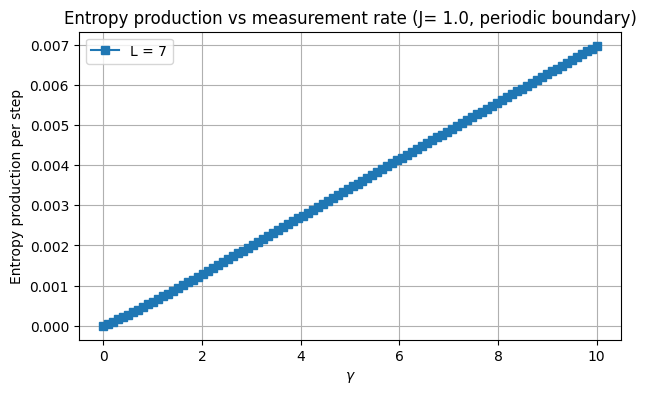

In [4]:
# Plot the entropy production per time step for each simulator
plt.figure(figsize=(7, 4))
plt.plot(gamma_values, rates_spin, 's-', label='L = 7')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'Entropy production per step')
plt.title('Entropy production vs measurement rate (J= 1.0, periodic boundary)')
plt.legend()
plt.grid(True)
plt.show()

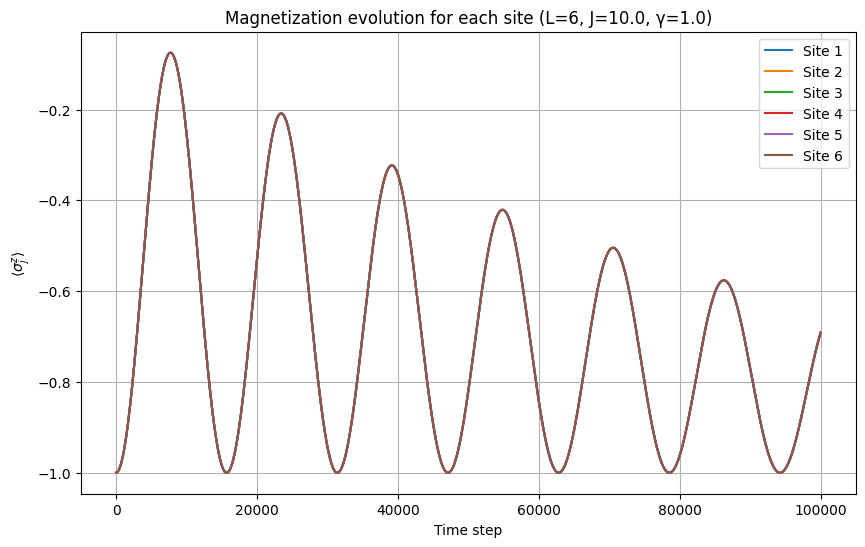

In [23]:
# Plot z_traj(t) for each site from the spin simulator
# Run a single trajectory to visualize time evolution
L = 6
J = 10.0
N_steps = 100000
sim_spin_demo = NonHermitianSpinSimulator(L=L, J=J, gamma=1.0, N_steps=N_steps, closed_boundary=True)
Q_demo, z_traj_demo = sim_spin_demo.simulate_trajectory()

plt.figure(figsize=(10, 6))
time_steps = np.arange(N_steps + 1)
for site in range(L):
    plt.plot(time_steps, z_traj_demo[:, site], label=f'Site {site+1}')

plt.xlabel('Time step')
plt.ylabel(r'$\langle \sigma^z_j \rangle$')
plt.title(f'Magnetization evolution for each site (L={L}, J={J}, γ=1.0)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Simulation parameters
L = 10         # number of sites
J = 1.0        # coherent hopping strength
N_steps = 10000 # discretisation of total time T=1

# Measurement rates to scan over
gamma_values = np.linspace(0.0, 10.0, 100)

rates_adjusted = []

# Iterate over gamma values and collect entropy per time step
for gamma in gamma_values:
    # Adjusted simulator: subtract γ L from the entropy budget
    sim_adj = NonHermitianAdjustedSimulator(L=L, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=True)
    Q_adj, n_traj_adj = sim_adj.simulate_trajectory()
    rates_adjusted.append(Q_adj / N_steps)


rates_adjusted = np.array(rates_adjusted)


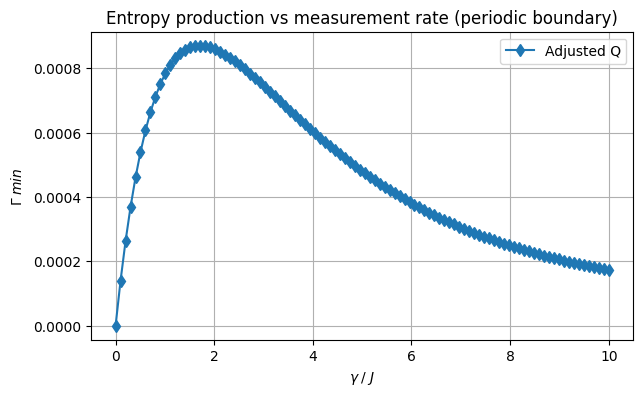

In [15]:
# Plot the entropy production per time step for each simulator
plt.figure(figsize=(7, 4))
gamma_J = gamma_values / J
gamma_min_est = (rates_adjusted) / 4.0
plt.plot(gamma_J, gamma_min_est, 'd-', label='Adjusted Q')
plt.xlabel(r'$\gamma _ / _ J$')
plt.ylabel(r'$\Gamma _ min$')
plt.title('Entropy production vs measurement rate (periodic boundary)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Simulation parameters
L = [6, 7, 8, 9, 10]         # number of sites
J = 1.0        # coherent hopping strength
N_steps = 10000 # discretisation of total time T=1

# Measurement rates to scan over
gamma_values = np.linspace(0.0, 10.0, 100)

rates_adjusted = []
all_rates_arranged = []

# Iterate over gamma values and collect entropy per time step
for l in L:
    for gamma in gamma_values:
        # Adjusted simulator: subtract γ L from the entropy budget
        sim_adj = NonHermitianAdjustedSimulator(L=l, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=True)
        Q_adj, n_traj_adj = sim_adj.simulate_trajectory()
        rates_adjusted.append(Q_adj / N_steps)


    all_rates_arranged.append(np.array(rates_adjusted))
    rates_adjusted = []  # Reset for the next L value

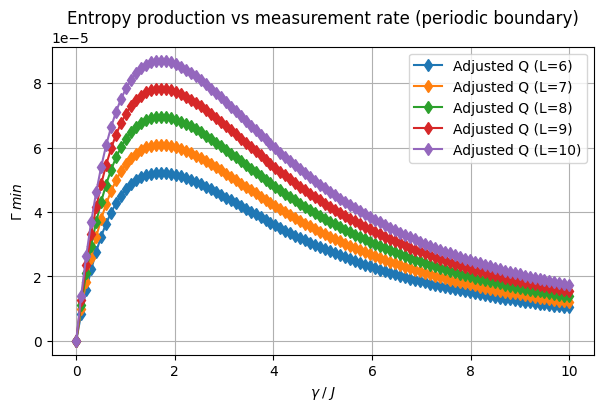

In [8]:
# Plot the entropy production per time step for each simulator
plt.figure(figsize=(7, 4))
gamma_J = gamma_values / J
gamma_min_est = [rates / 4.0 for rates in all_rates_arranged]
for l in L:
    plt.plot(gamma_J, gamma_min_est[l-6], 'd-', label=f'Adjusted Q (L={l})')
plt.xlabel(r'$\gamma _ / _ J$')
plt.ylabel(r'$\Gamma _ min$')
plt.title('Entropy production vs measurement rate (periodic boundary)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#now for open boundrey conditions
# Simulation parameters
L = [6, 7, 8, 9, 10]         # number of sites
J = 1.0        # coherent hopping strength
N_steps = 10000 # discretisation of total time T=1

# Measurement rates to scan over
gamma_values = np.linspace(0.0, 10.0, 100)

rates_adjusted = []
all_rates_arranged = []

# Iterate over gamma values and collect entropy per time step
for l in L:
    for gamma in gamma_values:
        # Adjusted simulator: subtract γ L from the entropy budget
        sim_adj = NonHermitianAdjustedSimulator(L=l, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=False)
        Q_adj, n_traj_adj = sim_adj.simulate_trajectory()
        rates_adjusted.append(Q_adj / N_steps)


    all_rates_arranged.append(np.array(rates_adjusted))
    rates_adjusted = []  # Reset for the next L value

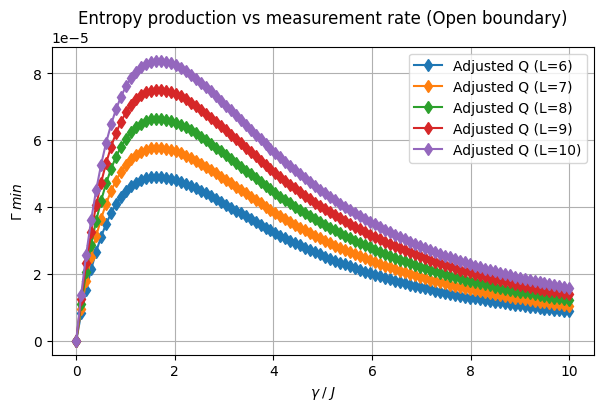

In [10]:
# Plot the entropy production per time step for each simulator
plt.figure(figsize=(7, 4))
gamma_J = gamma_values / J
gamma_min_est = [rates / 4.0 for rates in all_rates_arranged]
for l in L:
    plt.plot(gamma_J, gamma_min_est[l-6], 'd-', label=f'Adjusted Q (L={l})')
plt.xlabel(r'$\gamma _ / _ J$')
plt.ylabel(r'$\Gamma _ min$')
plt.title('Entropy production vs measurement rate (Open boundary)')
plt.legend()
plt.grid(True)
plt.show()


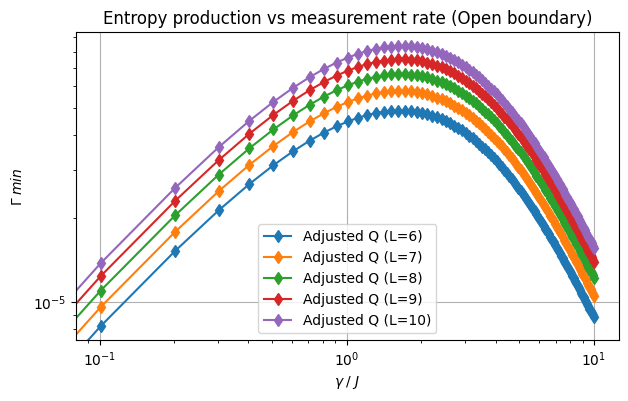

In [11]:
# Plot the entropy production per time step for each simulator
plt.figure(figsize=(7, 4))
gamma_J = gamma_values / J
gamma_min_est = [rates / 4.0 for rates in all_rates_arranged]
for l in L:
    plt.loglog(gamma_J, gamma_min_est[l-6], 'd-', label=f'Adjusted Q (L={l})')
plt.xlabel(r'$\gamma _ / _ J$')
plt.ylabel(r'$\Gamma _ min$')
plt.title('Entropy production vs measurement rate (Open boundary)')
plt.legend()
plt.grid(True)
plt.show()


## Area law VS Volume law
will now run some calculations to see if we can recognize a phase shift given constant gamma and growing L

In [25]:
# Simulation parameters
L = [8, 10, 12, 14, 16, 18, 20, 25, 30]         # number of sites
J = 1.0        # coherent hopping strength
N_steps = 10000 # discretisation of total time T=1

# Measurement rates to scan over
gamma_values = np.array([1, 2, 3, 4, 5])

rates_adjusted = []
all_rates_arranged = []

# Iterate over gamma values and collect entropy per time step
for l in L:
    for gamma in gamma_values:
        # Adjusted simulator: subtract γ L from the entropy budget
        sim_adj = NonHermitianAdjustedSimulator(L=l, J=J, gamma=gamma, N_steps=N_steps, closed_boundary=True)
        Q_adj, n_traj_adj = sim_adj.simulate_trajectory()
        rates_adjusted.append(Q_adj / N_steps)


    all_rates_arranged.append(np.array(rates_adjusted))
    rates_adjusted = []  # Reset for the next L value